## Discriminating cryo-EM particles in images
👋 Welcome to the cryo-EM project! This Python-based toolkit is designed to facilitate the reconstruction process in cryo-electron microscopy (cryo-EM), and is comprised of three main functionalities:

* Step 1: Compare – Compares images with reference particles to filter out noise, serving as the initial particle picking phase.
* Step 2: Cluster – Groups identified particles into clusters based on visual similarity, crucial for organising data for analysis.
* Step 3: Visualise – Creates graphical representation of clusters to evaluate clustering quality and understand particle distribution.

### Getting started ✨
First, we need to import the **cryo_em** class, which is found in our **cryo_em_toolkit**. We can print the class name to confirm the class has been successfully imported into the Jupyter Notebook, and it's accessible for further use in this notebook.

In [1]:
# Import our cryo_em class from the cryo_em_toolkit
from cryo_em_toolkit import cryo_em
print(cryo_em)

<class 'cryo_em_toolkit.cryo_em'>


Next, we should ensure our data in our **.npz** file is being loaded correctly.

In [2]:
# Create an instance of our cryo_em class
my_cryo_em = cryo_em()

# Load and count images in the .npz data file
filepath = './project_em_particle/all_images.npz'
images = my_cryo_em.load_images(filepath)
num_images = len(images)
print(f"The number of images in the .npz file: {num_images}")

The number of images in the .npz file: 300


### Step 1: Compare 🔎
We can now create instances of our **cryo_em** class and call its methods as needed. Let's begin by importing our default selection of images (which you can find in the **all_images.npz** file), and determining if the images are visually similar enough to known particles to be classified as particles themselves. This is particularly useful for cryo-EM analysis, as visuals can be quite noisy and make it difficult to determine what is and isn't a particle at scale: this will serve as our basic particle picker functionality. 

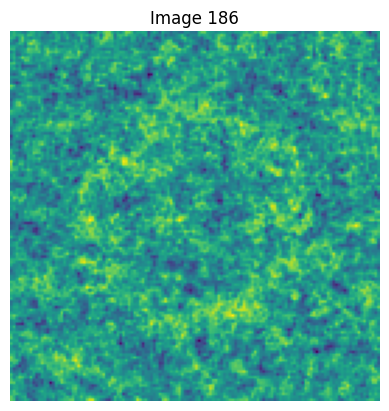

This image is visually similar to the reference images: True


In [3]:
import matplotlib.pyplot as plt

# Create an instance of the cryo_em class
my_cryo_em = cryo_em()

# Load images
filepath = './project_em_particle/all_images.npz'
images = my_cryo_em.load_images(filepath)

# Example parameters, adjust treshold as required and select different images
reference_images = images[:5]
threshold = 0.05
image_index = 186

# Display the image in question
plt.imshow(images[image_index])
plt.title(f"Image {image_index}")
plt.axis('off')
plt.show()

# Comparing the specific image to the reference images
result = my_cryo_em.compare_with_reference(images[image_index], reference_images, threshold)
print("This image is visually similar to the reference images:", result)


### Step 2: Cluster 📦 
After comparing individual images to our reference particles, and identifying those that are similar enough to be considered particles, the next step in our cryo-EM analysis pipeline is to group these identified particles into clusters. Clustering similar particles together can help with data analysis as we group particles with similar orientations or structures. This can be crucial for deeper, real-world analysis such as 3D reconstruction, where organising particles grouped by similarity can improve the quality of data analysis results.

Our **cryo_em** class also provides us with a basic hierarchical clustering method to accomplish this. The **hierarchical_clustering** function allows us to group the images we've identified as particles into a specified number of clusters, based on their similarity. This process is automated and based on the calculated similarity between images, helping us to manage and analyse large datasets more effectively. Let's see how we can apply the clustering functionality in action!*

*As a heads up, this can currently take up to 15 minutes to compare, sort and assign labels to all 300 images, as we're converting our 3D image arrays into 1D arrays: this flattening process aligns all the pixels in a single row, making it possible to compute the correlation across corresponding pixels in the two images. This is why it takes a fair amount of time – so while that's running, why not grab a snack, get some fresh air or pick up that dusty book you've been meaning to read.*

In [4]:
# Create an instance of the cryo_em class
cryo_em_instance = cryo_em()

# Load images
images = cryo_em_instance.load_images('./project_em_particle/all_images.npz')

# Perform clustering on the identified particles, adjust number of clusters as required
n_clusters = 5
labels = cryo_em_instance.hierarchical_clustering(images, n_clusters)

Let's check how many images we have in each cluster to confirm we've correctly categorised our 300 images.

*Note, numbering in Python starts at 0, so our first cluster is labelled Cluster 0!* ✨

In [5]:
from collections import Counter

# Count images in each cluster
cluster_counts = Counter(labels)

# Return result
print("Cluster distribution after compare analysis:")
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label}: {count} images")

Cluster distribution after compare analysis:
Cluster 0: 256 images
Cluster 1: 4 images
Cluster 2: 12 images
Cluster 3: 16 images
Cluster 4: 12 images


Each image now has a cluster label associated with it under 'labels' – with our particles now grouped into clusters, we can proceed with analysing each cluster independently. This can involve further comparison within clusters to refine our categorisation or preparing data for 3D reconstruction, where having similarly oriented particles together is beneficial. Clustering not only aids in organising our data, but also lays the groundwork for more detailed analysis and better understanding of the structures being studied in cryo-EM projects.

### Step 3: Visualise 👁️
Finally, let's explore how we can visualise our clusters to deliver data insights, and determine the effectiveness of our clustering process. We need to call the **visualise_clusters** method with the images and labels built in the previous steps. We can adjust **n_samples** in the class based on how many images you want to sample from each cluster for visualisation.

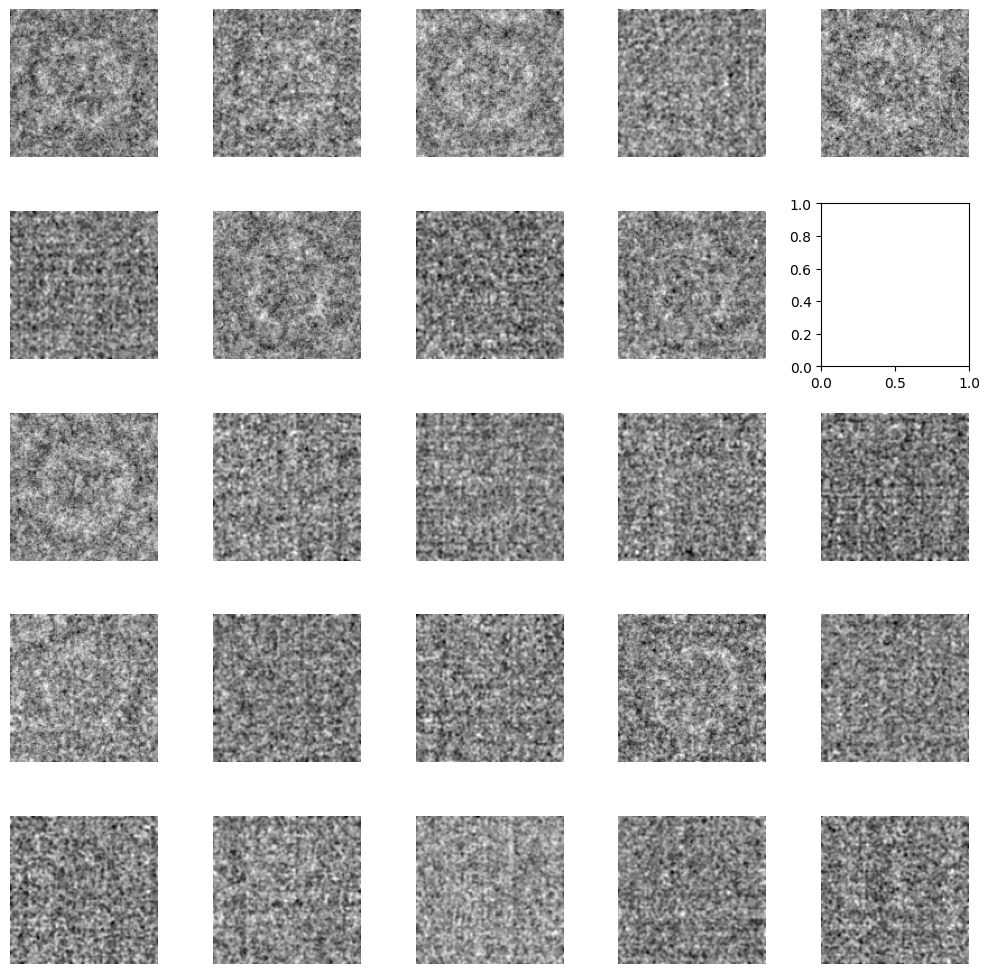

In [7]:
# Create visualisation
cryo_em_instance.visualise_clusters(images, labels, n_samples=5)

### Further thinking: Example Adaptations for Cryo-EM 🧠
Real world use cases for Cryo-EM image classification are a fast moving domain. You can start thinking about how you might want to create different data visualisations, such as graphs interpreting the data from processing large datasets, through to building neural networks for deeper pattern recognition.

The following script generates a simple chart, showing the percentage of images that were considered similar (True) versus not similar (False) to the set of reference images based on our **compare_with_reference** method from our toolkit's criteria. his approach is a very basic, visual way to highlight the distribution of similarity outcomes across our dataset; building a solution at scale would need adjustments (ensuring the reference images and thresholds are appripriately chosen) and processing time considerations for larger batasets (where we might consider sampling and parallel processing for greater efficiency).

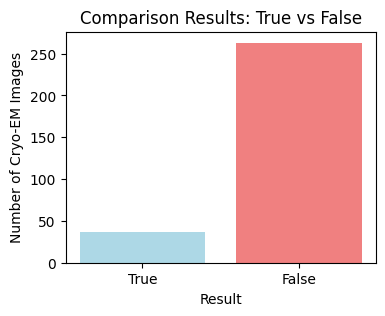

In [4]:
from cryo_em_toolkit import cryo_em
import matplotlib.pyplot as plt
import numpy as np

# Initialise the cryo_em class and load images
my_cryo_em = cryo_em()
filepath = './project_em_particle/all_images.npz'  
images = my_cryo_em.load_images(filepath)

# Define reference images and the desired threshold for comparison
reference_images = images[:5]
threshold = 0.05  

# Initialise count for True and False results
true_count = 0
false_count = 0

# Compare each image to the reference images and update the count accordingly
for image in images:
    is_similar = my_cryo_em.compare_with_reference(image, reference_images, threshold)
    if is_similar:
        true_count += 1
    else:
        false_count += 1

# Prepare data and plot a bar chart
labels = ['True', 'False']
counts = [true_count, false_count]
plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['lightblue', 'lightcoral'])
plt.xlabel('Result')
plt.ylabel('Number of Cryo-EM Images')
plt.title('Comparison Results: True vs False')
plt.xticks(labels)
plt.show()

Building a neural network for analysing cryo-EM images is a great route for further exploration (if you've enjoyed this project!) given the potential for automating and refining particle picking. With just 300 images in our dataset, setting up a robust neural network would have its challenges, particularly with the risk of overfitting and hefty data needs. However, you can explore and export larger datasets from resources such as from [EMPIAR](https://www.ebi.ac.uk/empiar/), the Electron Microscopy Public Image Archive – our project here is just to help you get started!

To close off this project, we'll take a simpler route: building a network visualisation of the particple image similarity. By visualising the similarity between our dataset with network graphs, we can uncover valuable insights within the dataset. This approach lays the groundwork and sparks curiosity to dive deeper into neural networks for cryo-EM analysis down the line.

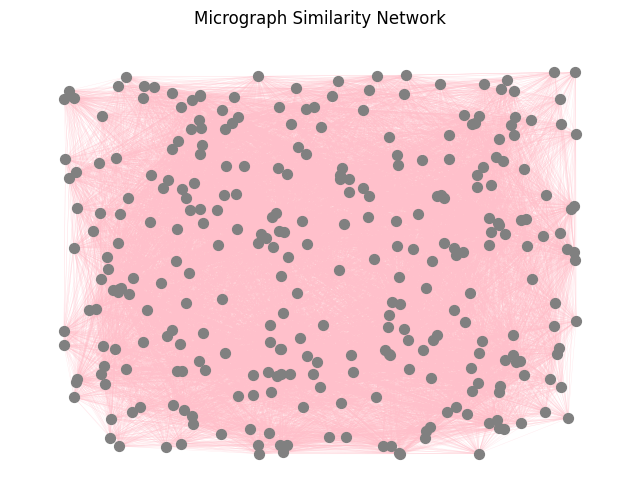

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load images from .npz file
def load_images(filepath):
    data = np.load(filepath)
    images = data['arr_0']
    return images

# Visualisation customisation
options = {
    "node_size": 50, 
    "node_color": "grey",
    "edge_color": "pink",
    "font_color": "blue",
    "width": 0.25,  
}

# File path
filepath = './project_em_particle/all_images.npz'
images = load_images(filepath)

# Use image data to determine network, number of nodes = number of loaded images
num_micrographs = len(images) 
similarity_threshold = 0.5 

G = nx.random_geometric_graph(num_micrographs, similarity_threshold, seed=42)

# Assign positions
pos = nx.get_node_attributes(G, "pos")
if not pos: 
    pos = {i: (np.random.uniform(), np.random.uniform()) for i in range(num_micrographs)}

# Visualise network
fig, ax = plt.subplots(figsize=(8, 6))
# Apply edge color and width, node color and size
nx.draw_networkx_edges(G, pos, alpha=0.4, width=options['width'], edge_color=options['edge_color'], ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=options['node_size'], node_color=options['node_color'], ax=ax)

ax.axis("off")
plt.title("Micrograph Similarity Network")
plt.show()